R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [8]:
library(reshape2)
library(readxl)
library(curl)
library(httr)

Response [https://ars.els-cdn.com/content/image/1-s2.0-S0092867412010227-mmc4.xlsx]
  Date: 2018-12-13 07:33
  Status: 200
  Content-Type: application/excel
  Size: 4.4 MB
<ON DISK>  /tmp/Rtmp2Bat9r/filef145bcb01.xlsxNULL

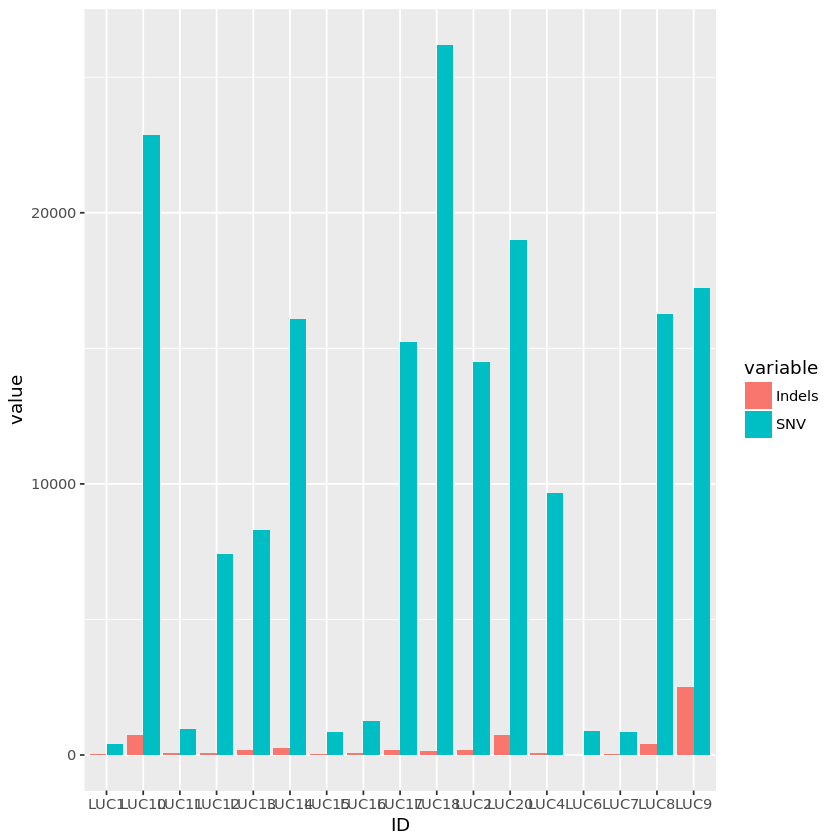

In [9]:
url1 = "https://ars.els-cdn.com/content/image/1-s2.0-S0092867412010227-mmc4.xlsx"
GET(url1, write_disk(tf <- tempfile(fileext = ".xlsx")))
df = read_excel(tf, "Table S8" )

dfData = as_data_frame(df)
dfData = dfData[-c(1:2),]
names(dfData) = c("ID","Total SNV","Total Indels","Tier1 SNV","Tier2 SNV","Tier3 SNV")

myTib = tibble(ID = dfData$ID, Indels = dfData$`Total Indels`, SNV = dfData$`Total SNV`)

df.long=melt(myTib, id.vars = "ID")
df.long$value = as.numeric((as.character(df.long$value)))


ggplot(df.long,aes(x=ID,y = value,fill=variable))+
  geom_bar(position="dodge",stat="identity")
